# Covid-19 Analysis

We all know what the current scenario of the world as affected by COVID-19. Here, I am trying to find out the most affected regions/country and other possibilities.

Details about the dataset:
- Dataset Id:  owid-covid-19-latest
- Source:      https://github.com/owid/covid-19-data/tree/master/public/data
- Description: Covid-19 Stats by Our World in Data
- Download: 
        import opendatasets
        opendatasets.download("filename")
- Tools Used: Anaconda (Jupyter Notebook)         

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [ ]:
#installing the required library
!pip install jovian pandas numpy matplotlib opendatasets --upgrade -q

In [1]:
#name of the project name
project_name = "Covid-19 Analysis" 

In [37]:
#importing the modules (library)
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#saving the file and uploading it to jovian profile
jovian.commit(project=project_name, privacy='secret', evironment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rajibdasbhagat/covid-19-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


[jovian] Error: Failed to read Anaconda environment using command: "conda env export -n base --no-builds"


[jovian] Committed successfully! https://jovian.ml/rajibdasbhagat/covid-19-analysis


'https://jovian.ml/rajibdasbhagat/covid-19-analysis'

#### Step 1: Select a real-world dataset 

- Dataset: owid-covid-19-latest
- Dataset size:  44574 rows × 41 columns.
- Dataset type: csv

In [4]:
#downloading the dataset
import opendatasets as od
od.download('owid-covid-19-latest')

Using downloaded and verified file: .\owid-covid-19-latest\owid-covid-data.csv
Using downloaded and verified file: .\owid-covid-19-latest\owid-covid-data-last-updated-timestamp.txt
Using downloaded and verified file: .\owid-covid-19-latest\owid-covid-codebook.csv


In [5]:
#checking the file is present or not
import os
os.listdir('owid-covid-19-latest')

['owid-covid-codebook.csv',
 'owid-covid-data-last-updated-timestamp.txt',
 'owid-covid-data.csv']

#### Step 2: Perform data preparation & cleaning

In [6]:
#loading the dataset using pandas 
raw_df = pd.read_csv('owid-covid-19-latest/owid-covid-data.csv')
raw_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44569,NaN,NaN,International,2020-09-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44570,NaN,NaN,International,2020-09-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44571,NaN,NaN,International,2020-09-16,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44572,NaN,NaN,International,2020-09-17,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#finding the number of rows & columns (size/shape) of the original DataFrame
dim = raw_df.shape
number_rows=dim[0]
number_columns=dim[1]
print("In original dataset, their are {} rows and {} columns.".format(number_rows,number_columns))

In original dataset, their are 44574 rows and 41 columns.


In [8]:
#creating new DataFrame columns=['continent','location', 'date', 'total_cases','total_deaths', 'diabetes_prevalence' , 'female_smokers', 'male_smokers']
new_df = pd.DataFrame(raw_df, columns=['continent','location', 'date', 'total_cases','total_deaths', 'diabetes_prevalence' , 'female_smokers', 'male_smokers'])
new_df

,continent,location,date,total_cases,total_deaths,diabetes_prevalence,female_smokers,male_smokers
0,North America,Aruba,2020-03-13,2.0,0.0,11.62,NaN,NaN
1,North America,Aruba,2020-03-19,NaN,NaN,11.62,NaN,NaN
2,North America,Aruba,2020-03-20,4.0,0.0,11.62,NaN,NaN
3,North America,Aruba,2020-03-21,NaN,NaN,11.62,NaN,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,11.62,NaN,NaN
...,...,...,...,...,...,...,...,...
44569,NaN,International,2020-09-14,696.0,7.0,NaN,NaN,NaN
44570,NaN,International,2020-09-15,696.0,7.0,NaN,NaN,NaN
44571,NaN,International,2020-09-16,696.0,7.0,NaN,NaN,NaN
44572,NaN,International,2020-09-17,696.0,7.0,NaN,NaN,NaN


In [9]:
#checking columns of the DataFrame and its type
new_df.columns

Index(['continent', 'location', 'date', 'total_cases', 'total_deaths',
       'diabetes_prevalence', 'female_smokers', 'male_smokers'],
      dtype='object')

In [10]:
#finding details about the DataFrame new_df such as no_rows and count of non-null values and its type that every columns contains. 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44574 entries, 0 to 44573
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   continent            44048 non-null  object 
 1   location             44574 non-null  object 
 2   date                 44574 non-null  object 
 3   total_cases          43971 non-null  float64
 4   total_deaths         43971 non-null  float64
 5   diabetes_prevalence  41173 non-null  float64
 6   female_smokers       31217 non-null  float64
 7   male_smokers         30824 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.7+ MB


In [11]:
#finding statistical details about the DataFrame new_df 
#such as count, mean, standard deviation, min, max, etc for each columns.
new_df.describe()

,total_cases,total_deaths,diabetes_prevalence,female_smokers,male_smokers
count,4.397100e+04,43971.000000,41173.000000,31217.000000,30824.000000
mean,9.278160e+04,3860.201269,8.048797,10.835908,32.637052
std,9.609875e+05,36006.995112,4.142762,10.482232,13.407672
min,0.000000e+00,0.000000,0.990000,0.100000,7.700000
25%,5.200000e+01,0.000000,5.310000,1.900000,21.400000
50%,9.240000e+02,17.000000,7.110000,6.400000,31.400000
75%,9.858500e+03,211.000000,10.180000,19.600000,40.900000
max,3.021450e+07,946665.000000,23.360000,44.000000,78.100000


In [12]:
#cleaning NaN values to 0
new_df.fillna(0)

,continent,location,date,total_cases,total_deaths,diabetes_prevalence,female_smokers,male_smokers
0,North America,Aruba,2020-03-13,2.0,0.0,11.62,0.0,0.0
1,North America,Aruba,2020-03-19,0.0,0.0,11.62,0.0,0.0
2,North America,Aruba,2020-03-20,4.0,0.0,11.62,0.0,0.0
3,North America,Aruba,2020-03-21,0.0,0.0,11.62,0.0,0.0
4,North America,Aruba,2020-03-22,0.0,0.0,11.62,0.0,0.0
...,...,...,...,...,...,...,...,...
44569,0,International,2020-09-14,696.0,7.0,0.00,0.0,0.0
44570,0,International,2020-09-15,696.0,7.0,0.00,0.0,0.0
44571,0,International,2020-09-16,696.0,7.0,0.00,0.0,0.0
44572,0,International,2020-09-17,696.0,7.0,0.00,0.0,0.0


In [13]:
#removing world and International stats
international_df=new_df[new_df['location']=='International']
without_int_df=new_df.drop(international_df.index)
#without_int_df
world_df=without_int_df[without_int_df['location']=='World']
country_df=without_int_df.drop(world_df.index)

country_df

,continent,location,date,total_cases,total_deaths,diabetes_prevalence,female_smokers,male_smokers
0,North America,Aruba,2020-03-13,2.0,0.0,11.62,NaN,NaN
1,North America,Aruba,2020-03-19,NaN,NaN,11.62,NaN,NaN
2,North America,Aruba,2020-03-20,4.0,0.0,11.62,NaN,NaN
3,North America,Aruba,2020-03-21,NaN,NaN,11.62,NaN,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,11.62,NaN,NaN
...,...,...,...,...,...,...,...,...
44043,Africa,Zimbabwe,2020-09-14,7526.0,224.0,1.82,1.6,30.7
44044,Africa,Zimbabwe,2020-09-15,7531.0,224.0,1.82,1.6,30.7
44045,Africa,Zimbabwe,2020-09-16,7576.0,224.0,1.82,1.6,30.7
44046,Africa,Zimbabwe,2020-09-17,7598.0,224.0,1.82,1.6,30.7


In [14]:
#creating a new DataFrame with columns as listed below
total_df = pd.DataFrame()
total_df['continent']           =country_df['continent'].copy() 
total_df['location']            = country_df['location'].copy()
total_df['date']                = country_df['date'].copy()
total_df['total_cases']         = country_df['total_cases'].copy()
total_df['total_deaths']        = country_df['total_deaths'].copy()
total_df['no_diabetes']         = ((country_df['diabetes_prevalence'] * country_df['total_cases'])/100).apply(np.ceil)    
total_df['no_female_smokers']   = ((country_df['female_smokers'] * country_df['total_cases'])/100).apply(np.ceil)
total_df['no_male_smokers']     = ((country_df['male_smokers'] * country_df['total_cases'])/100).apply(np.ceil)
total_df['total_smokers']        = (total_df['no_female_smokers'] + total_df['no_male_smokers']).apply(np.ceil)
#cleaning
df=total_df.fillna(0).copy()
df

,continent,location,date,total_cases,total_deaths,no_diabetes,no_female_smokers,no_male_smokers,total_smokers
0,North America,Aruba,2020-03-13,2.0,0.0,1.0,0.0,0.0,0.0
1,North America,Aruba,2020-03-19,0.0,0.0,0.0,0.0,0.0,0.0
2,North America,Aruba,2020-03-20,4.0,0.0,1.0,0.0,0.0,0.0
3,North America,Aruba,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0
4,North America,Aruba,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
44043,Africa,Zimbabwe,2020-09-14,7526.0,224.0,137.0,121.0,2311.0,2432.0
44044,Africa,Zimbabwe,2020-09-15,7531.0,224.0,138.0,121.0,2313.0,2434.0
44045,Africa,Zimbabwe,2020-09-16,7576.0,224.0,138.0,122.0,2326.0,2448.0
44046,Africa,Zimbabwe,2020-09-17,7598.0,224.0,139.0,122.0,2333.0,2455.0


#### Step 3: Perform exploratory Analysis & Visualization

In [15]:
#calculation of rows & columns
dim=df.shape
number_rows=dim[0]
number_columns=dim[1]

print("Their are {} rows and {} columns.".format(number_rows,number_columns))

Their are 44048 rows and 9 columns.


In [16]:
#few stats as per new dataframe
total_cases=df.total_cases.sum()
total_deaths=df.total_deaths.sum()
total_diabetes=df.no_diabetes.sum()
total_female_smokers=df.no_female_smokers.sum()
total_male_smokers=df.no_male_smokers.sum()
total_smokers=total_female_smokers + total_male_smokers

print("          World Stats           ")
print("--------------------------------")
print("Cases:         ", int(total_cases))
print("Deaths:          ", int(total_deaths))
print("Diabetic:       ", int(total_diabetes))
print("Male Smokers:   ", int(total_male_smokers))
print("Female Smokers: ", int(total_female_smokers))
print("Smokers:        ", int(total_smokers))
print("Mortality Rate:        {}%    ".format(round(total_deaths/total_cases,3)*100))

          World Stats           
--------------------------------
Cases:          2039383427
Deaths:           84851787
Diabetic:        182182332
Male Smokers:    538076672
Female Smokers:  265246272
Smokers:         803322944
Mortality Rate:        4.2%    


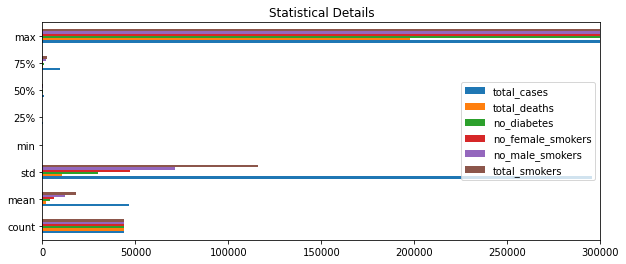

In [17]:
#statistical details of the DataFrame df
desc=df.describe()

#plotting the statistical details
ax=desc.plot.barh(figsize=(10,4))
ax.set_xlim(0, 300000) 
plt.title("Statistical Details")
plt.legend(loc='center right', frameon=True)


In [18]:
#finding list of countries
unique_countries=df.location.unique()
total=len(unique_countries)

count=0
for i in range(total):
        print(unique_countries[i],end=' ')
        count += 1   

Aruba Afghanistan Angola Anguilla Albania Andorra United Arab Emirates Argentina Armenia Antigua and Barbuda Australia Austria Azerbaijan Burundi Belgium Benin Bonaire Sint Eustatius and Saba Burkina Faso Bangladesh Bulgaria Bahrain Bahamas Bosnia and Herzegovina Belarus Belize Bermuda Bolivia Brazil Barbados Brunei Bhutan Botswana Central African Republic Canada Switzerland Chile China Cote d'Ivoire Cameroon Democratic Republic of Congo Congo Colombia Comoros Cape Verde Costa Rica Cuba Curacao Cayman Islands Cyprus Czech Republic Germany Djibouti Dominica Denmark Dominican Republic Algeria Ecuador Egypt Eritrea Western Sahara Spain Estonia Ethiopia Finland Fiji Falkland Islands France Faeroe Islands Gabon United Kingdom Georgia Guernsey Ghana Gibraltar Guinea Gambia Guinea-Bissau Equatorial Guinea Greece Grenada Greenland Guatemala Guam Guyana Hong Kong Honduras Croatia Haiti Hungary Indonesia Isle of Man India Ireland Iran Iraq Iceland Israel Italy Jamaica Jersey Jordan Japan Kazakhs

In [19]:
#finding the number of countries affected by Covid-19
total_countries = count
print("The total countries affected by Covid-19 is {}.".format(total_countries))

The total countries affected by Covid-19 is 210.


In [20]:
#finding details about the DataFrame df 
#such as no_rows and count of non-null values and its type that every columns contains and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44048 entries, 0 to 44047
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   continent          44048 non-null  object 
 1   location           44048 non-null  object 
 2   date               44048 non-null  object 
 3   total_cases        44048 non-null  float64
 4   total_deaths       44048 non-null  float64
 5   no_diabetes        44048 non-null  float64
 6   no_female_smokers  44048 non-null  float64
 7   no_male_smokers    44048 non-null  float64
 8   total_smokers      44048 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [21]:
#new statistical details about the dataframe country_df
desc=df.describe()
desc

,total_cases,total_deaths,no_diabetes,no_female_smokers,no_male_smokers,total_smokers
count,4.404800e+04,44048.000000,44048.000000,4.404800e+04,4.404800e+04,4.404800e+04
mean,4.629912e+04,1926.348234,4135.995550,6.021755e+03,1.221569e+04,1.818169e+04
std,2.953099e+05,10496.124370,29750.196277,4.704719e+04,7.119881e+04,1.160519e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.900000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.820000e+02,15.000000,53.000000,5.000000e+00,4.300000e+01,4.800000e+01
75%,9.247250e+03,197.000000,628.000000,4.070000e+02,1.707000e+03,2.381250e+03
max,6.674458e+06,197633.000000,720175.000000,1.274822e+06,1.641917e+06,2.916739e+06


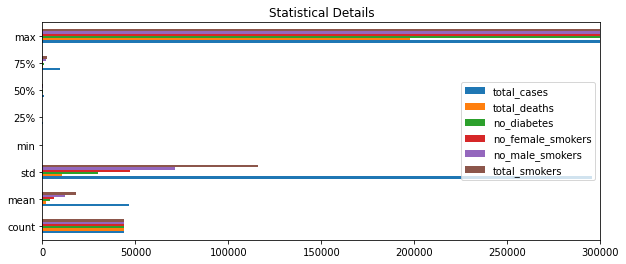

In [22]:
#plotting the describe() details
ax=desc.plot.barh(figsize=(10,4))
ax.set_xlim(0, 300000) 
plt.title("Statistical Details")
plt.legend(loc='center right', frameon=True)


In [23]:
df

,continent,location,date,total_cases,total_deaths,no_diabetes,no_female_smokers,no_male_smokers,total_smokers
0,North America,Aruba,2020-03-13,2.0,0.0,1.0,0.0,0.0,0.0
1,North America,Aruba,2020-03-19,0.0,0.0,0.0,0.0,0.0,0.0
2,North America,Aruba,2020-03-20,4.0,0.0,1.0,0.0,0.0,0.0
3,North America,Aruba,2020-03-21,0.0,0.0,0.0,0.0,0.0,0.0
4,North America,Aruba,2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
44043,Africa,Zimbabwe,2020-09-14,7526.0,224.0,137.0,121.0,2311.0,2432.0
44044,Africa,Zimbabwe,2020-09-15,7531.0,224.0,138.0,121.0,2313.0,2434.0
44045,Africa,Zimbabwe,2020-09-16,7576.0,224.0,138.0,122.0,2326.0,2448.0
44046,Africa,Zimbabwe,2020-09-17,7598.0,224.0,139.0,122.0,2333.0,2455.0


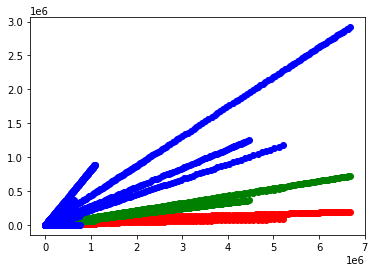

In [24]:
#Visualization using scatter 
ax = plt.gca()
ax.scatter(df['total_cases'], df['total_deaths'], color="r")
ax.scatter(df['total_cases'], df['no_diabetes'], color="g")
ax.scatter(df['total_cases'], df['total_smokers'], color="b")

In [25]:
#stats by continent
continent_df=pd.DataFrame()
continent_df['cases']=df.groupby("continent")["total_cases"].sum()
continent_df['deaths']=df.groupby("continent")["total_deaths"].sum()
continent_df['diabetics']=df.groupby("continent")["no_diabetes"].sum()
continent_df['smokers']=df.groupby("continent")["total_smokers"].sum()

print(continent_df)


                     cases      deaths   diabetics      smokers
continent                                                      
Africa          88835376.0   2106535.0   5944281.0   28228071.0
Asia           507894646.0  11406660.0  53491407.0  162032622.0
Europe         394240179.0  29139704.0  23776101.0  240333670.0
North America  607057120.0  26748712.0  65363282.0  246913886.0
Oceania          2514421.0     42809.0    155029.0     722961.0
South America  438841685.0  15407367.0  33452232.0  122635950.0


array([<AxesSubplot:ylabel='cases'>, <AxesSubplot:ylabel='deaths'>,
       <AxesSubplot:ylabel='diabetics'>, <AxesSubplot:ylabel='smokers'>],
      dtype=object)

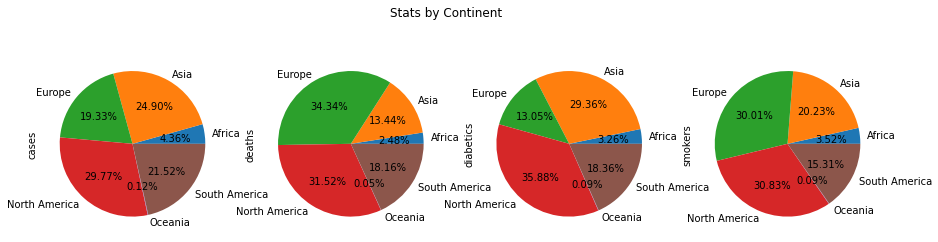

In [26]:
#Visualization of stats by continent
continent_df.plot.pie(subplots=True,figsize=(15,4),title='Stats by Continent',autopct='%1.2f%%', legend=False)

In [27]:
#stats by country
country_df=pd.DataFrame()
country_df['cases']=df.groupby("location")["total_cases"].sum().sort_values(ascending=False)
country_df['deaths']=df.groupby("location")["total_deaths"].sum().sort_values(ascending=False)
country_df['diabetics']=df.groupby("location")["no_diabetes"].sum().sort_values(ascending=False)
country_df['smokers']=df.groupby("location")["total_smokers"].sum().sort_values(ascending=False)

print(country_df.head(10))

                      cases      deaths   diabetics      smokers
location                                                        
United States   516711382.0  19996345.0  55753280.0  225803122.0
Brazil          274334323.0   9833793.0  22248618.0   76813822.0
India           206211913.0   4113133.0  21425535.0   46397921.0
Russia           95079625.0   1469296.0   5876048.0   77680285.0
Peru             49450607.0   2008459.0   2942408.0          0.0
Spain            49142037.0   4515310.0   3523612.0   28895758.0
Mexico           43710701.0   4833966.0   5708711.0   12370325.0
United Kingdom   43519998.0   5934500.0   1862780.0   19453639.0
South Africa     41952280.0    829279.0   2315861.0   17326484.0
Italy            40440865.0   5548121.0   1933196.0   19250066.0


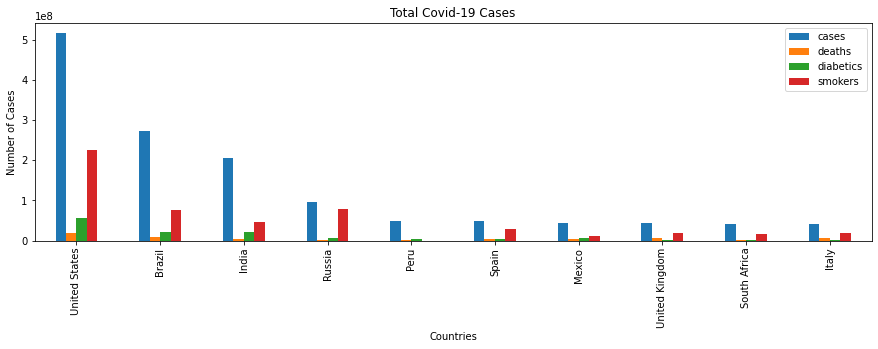

In [28]:
#Visualization of stats by country
country_df[:10].plot.bar(figsize=(15,4))
plt.title('Total Covid-19 Cases')
plt.xlabel('Countries')
plt.ylabel('Number of Cases')
plt.legend(loc='upper right', frameon=True)

In [29]:
#percent wise stats
country_percent_df=pd.DataFrame()
country_percent_df['mortality_rate'] = country_df['deaths']/country_df['cases'] * 100
country_percent_df['diabetic_rate'] = country_df['diabetics']/country_df['cases'] * 100
country_percent_df['smoker_rate'] = country_df['smokers']/country_df['cases'] * 100

country_percent_df[:5] 

,mortality_rate,diabetic_rate,smoker_rate
location,,,
United States,3.869925,10.790024,43.700048
Brazil,3.584602,8.110038,28.000077
India,1.994615,10.390057,22.500117
Russia,1.545332,6.180134,81.700243
Peru,4.061546,5.950196,0.000000


array([<AxesSubplot:ylabel='mortality_rate'>,
       <AxesSubplot:ylabel='diabetic_rate'>,
       <AxesSubplot:ylabel='smoker_rate'>], dtype=object)

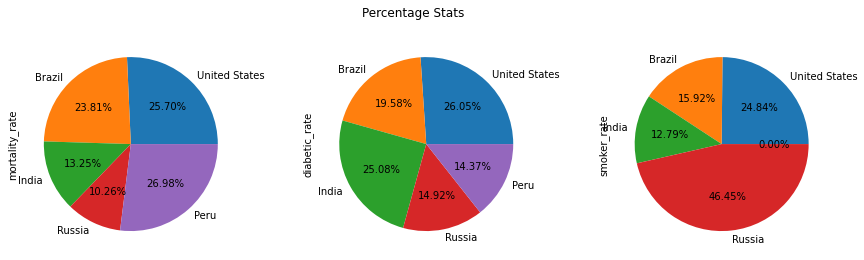

In [30]:
#Visualization by percentage stats
country_percent_df[:5].plot.pie(subplots=True,figsize=(15,4),title='Percentage Stats',autopct='%1.2f%%', legend=False)

#### Step 4: Ask & answer questions about the data

### 1. Which is the most affected country by Covid-19 in the world? 

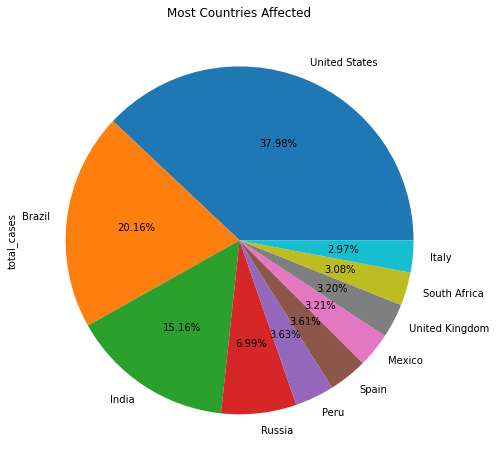

The most affected country is United States, with 516711382 registered cases.


In [31]:
#total cases by countries
total_cases=df.groupby("location")["total_cases"].sum().sort_values(ascending=False)

#plotting pie chart with options title='Most Countries Affected',figsize=(16,8),autopct='%1.2f%%', legend=False
#title denotes the title of the plotted figure
#figsize indicates the length and width of the plotted figure
#autopct calculates the percentage wise division of the plotted pie chart
#legend denotes the relation between the categories and color used. Here, it is turned off. 
total_cases[:10].plot.pie(title='Most Countries Affected',figsize=(16,8),autopct='%1.2f%%', legend=False)
plt.show()

#retrieve the first row values of the dataframe
top_country=total_cases.index[0]
top_value=total_cases.iloc[0]
print("The most affected country is {}, with {} registered cases.".format(top_country,int(top_value)))

### 2. Which date has the higest number of resgistered cases?

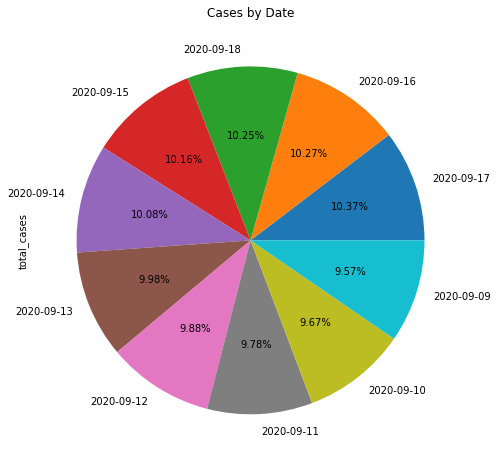

The most affected date is 2020-09-17, with 29915420 registered cases.


In [32]:
most_cases_by_date=df.groupby("date")["total_cases"].sum().sort_values(ascending=False)

#plotting pie chart with options title='Cases by Date',figsize=(16,8),autopct='%1.2f%%', legend=False
#title denotes the title of the plotted figure
#figsize indicates the length and width of the plotted figure
#autopct calculates the percentage wise division of the plotted pie chart
#legend denotes the relation between the categories and color used. Here, it is turned off.
most_cases_by_date[:10].plot.pie(title='Cases by Date',figsize=(16,8),autopct='%1.2f%%', legend=False)
plt.show()

#retrieve the first row values of the dataframe
top_date=most_cases_by_date.index[0]
top_date_value=most_cases_by_date.iloc[0]
print("The most affected date is {}, with {} registered cases.".format(top_date, int(top_date_value)))


### 3. What is the stats of a particular country? (user-input)

In [33]:
userInput=input().capitalize()

input_df=df[df['location']==userInput]
input_total_cases = input_df.total_cases.sum()
input_total_deaths = input_df.total_deaths.sum()
input_total_mortality_rate = input_total_deaths/input_total_cases*100 

print("{} registered total of {} cases, where the number of deaths is {} and the death rate is {:.2f} (approx).".format(userInput,int(input_total_cases), int(input_total_deaths),(input_total_mortality_rate)))

iNdIa
India registered total of 206211913 cases, where the number of deaths is 4113133 and the death rate is 1.99 (approx).


### 4. What % of the world is India affected by Covid-19?

In [35]:
for i in range(len(total_cases)): 
    if(total_cases.index[i]=='India'):
        india_total_cases=total_cases.iloc[i]
        break
        
percent=round(india_total_cases/continent_df['cases'].sum()*100,2)
print("With respect to the world, India is {}% affected by covid-19.".format(percent))

With respect to the world, India is 10.11% affected by covid-19.


#### Step 5: Summarize your inferences & write a conclusion

Summary:
- Here, we are able to analyse the different stats of the dataset involved.
- Learnt the loading of the dataset to pandas dataframe.
- Generated new dataframe, as per requirment for the analysis.
- Learnt to plot using visualization techniques.

Insights and graphs:
- Analysed the differernt statistical relation insights using various graphs such as barh, bar and pie charts.

Future Work:
- Analysing the relation between the total_cases, diabetic and smokers. Is their any relation? 

Links:
- Jovian www.jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- Stack Overflow www.stackoverflow.com
- Medium www.medium.com www.towardsdatascience.com
- Matplotlib www.matplotlib.org
- w3resource www.w3resource.com

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
